# Data Analytics Report: Impact of  Directors and Actors on Movie Success

In [33]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Reference to the movies_cleaned.csv file path
csv_path = Path("movies_cleaned.csv")

# Read the movies_cleaned.csv file as a DataFrame
movies_cleaned = pd.read_csv(csv_path)

movies_cleaned.head()

,Movie_Name,Rating,Genre,Year,Rating_Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Release_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [3]:
movies_cleaned.columns

Index(['Movie_Name', 'Rating', 'Genre', 'Year', 'Rating_Score', 'Votes',
       'Director', 'Writer', 'Star', 'Country', 'Budget', 'Gross', 'Company',
       'Runtime', 'Release_date'],
      dtype='object')

In [4]:
movies_cleaned.describe()

,Year,Rating_Score,Votes,Budget,Gross,Runtime
count,5407.000000,5407.000000,5.407000e+03,5.407000e+03,5.407000e+03,5407.000000
mean,2001.689846,6.393194,1.153467e+05,3.608856e+07,1.034955e+08,108.169595
std,10.532659,0.962755,1.845629e+05,4.159678e+07,1.874721e+08,18.122898
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.085234e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.200000e+07,3.729544e+07,105.000000
75%,2011.000000,7.100000,1.300000e+05,4.500000e+07,1.130424e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [5]:
movies_cleaned.isna().any()

Movie_Name      False
Rating          False
Genre           False
Year            False
Rating_Score    False
Votes           False
Director        False
Writer          False
Star            False
Country         False
Budget          False
Gross           False
Company         False
Runtime         False
Release_date    False
dtype: bool

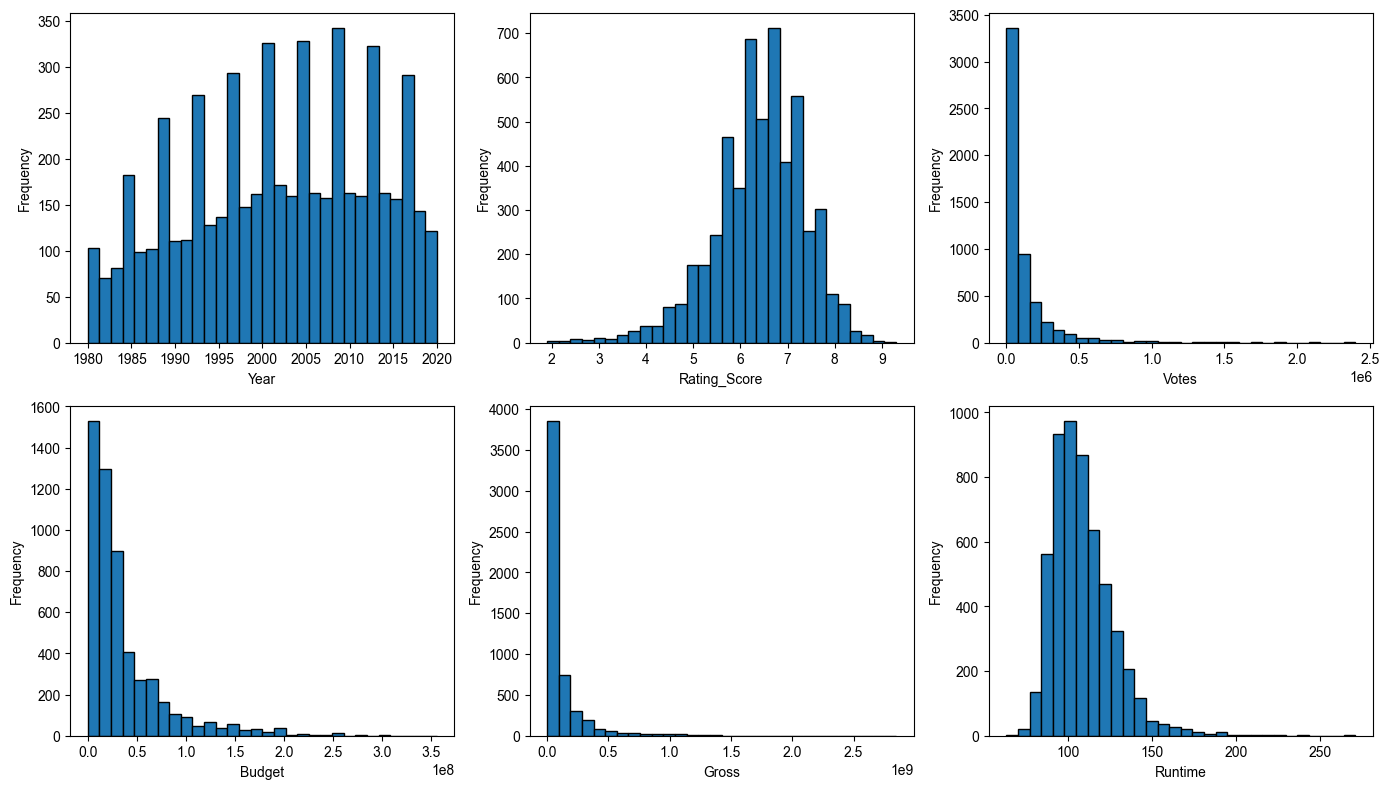

In [31]:
# Plot histograms for all variables in one plot
plt.figure(figsize=(14, 8))

variables = ['Year', 'Rating_Score', 'Votes', 'Budget', 'Gross', 'Runtime']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.hist(movies_cleaned[var], bins=30, edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(False) 

plt.tight_layout()

plt.show()


# Average Rating by Top Ten Directors

In [7]:
# Calculate the average rating for each director using groupby
average_rating_director = movies_cleaned.groupby('Director')['Rating_Score'].mean().sort_values(ascending=False)

# Display the results
avg_rating_director = pd.DataFrame(average_rating_director).rename(columns={'Rating_Score': 'Average Rating_Score'})
avg_rating_director.head(10)

,Average Rating_Score
Director,
Roberto Benigni,8.60
Tony Kaye,8.50
Nadine Labaki,8.40
Bob Persichetti,8.40
Sergio Leone,8.40
Stanley Kubrick,8.35
Giuseppe Tornatore,8.30
Lee Unkrich,8.30
Majid Majidi,8.30


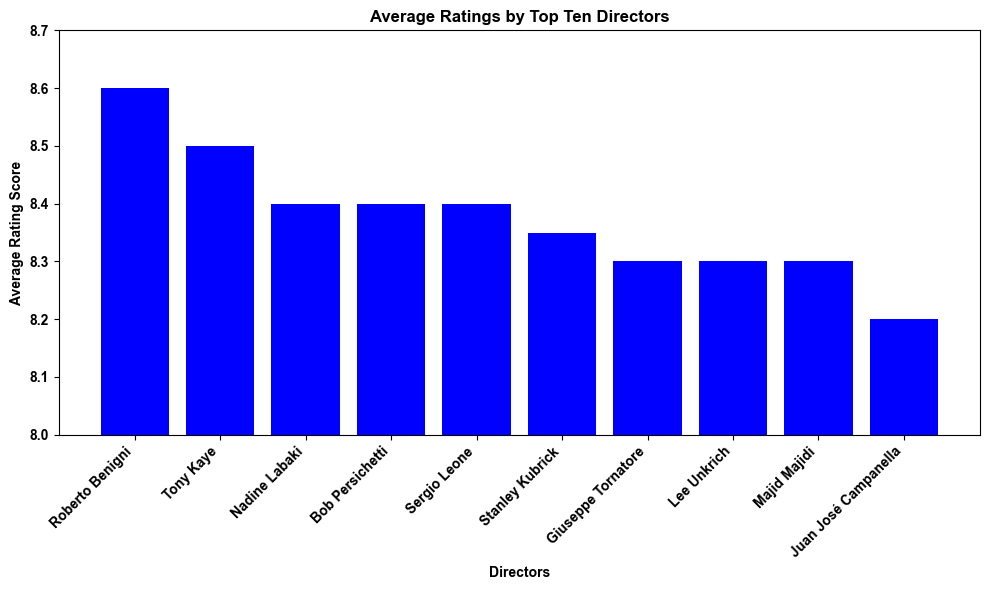

In [50]:
# Set font to Arial (or another sans-serif font of your choice)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Given data
directors = ["Roberto Benigni", "Tony Kaye", "Nadine Labaki", "Bob Persichetti", "Sergio Leone",
             "Stanley Kubrick", "Giuseppe Tornatore", "Lee Unkrich", "Majid Majidi", "Juan José Campanella"]
average_ratings = [8.60, 8.50, 8.40, 8.40, 8.40, 8.35, 8.30, 8.30, 8.30, 8.20]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(directors, average_ratings, color='blue')

# Make x-axis labels bold
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Make y-axis label bold
plt.ylabel('Average Rating Score', fontweight='bold')

# Make title bold
plt.title('Average Ratings by Top Ten Directors', fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Make x-axis label bold
plt.xlabel('Directors', fontweight='bold')

# Set the original y-axis limits
plt.ylim(8.0, 8.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.savefig('average_ratings_directors_plot.png', bbox_inches="tight")

# Display the plot
plt.show()


# Average Rating by Top Ten Actors

In [38]:
# Calculate the average rating for each actor using groupby
average_rating_actor = movies_cleaned.groupby('Star')['Rating_Score'].mean().sort_values(ascending=False)

# Display the results
avg_rating_actor_df = pd.DataFrame(average_rating_actor).rename(columns={'Rating_Score': 'Average Rating_Score'})
avg_rating_actor_df = avg_rating_actor_df.rename_axis('Actor')  # Rename the index to 'Actor'
avg_rating_actor_df.head(10)


,Average Rating_Score
Actor,
Mark Hamill,8.5
Philippe Noiret,8.5
Ulrich Mühe,8.4
Anthony Gonzalez,8.4
Zain Al Rafeea,8.4
Ben Burtt,8.4
Choi Min-sik,8.4
F. Murray Abraham,8.3
Ellen Burstyn,8.3


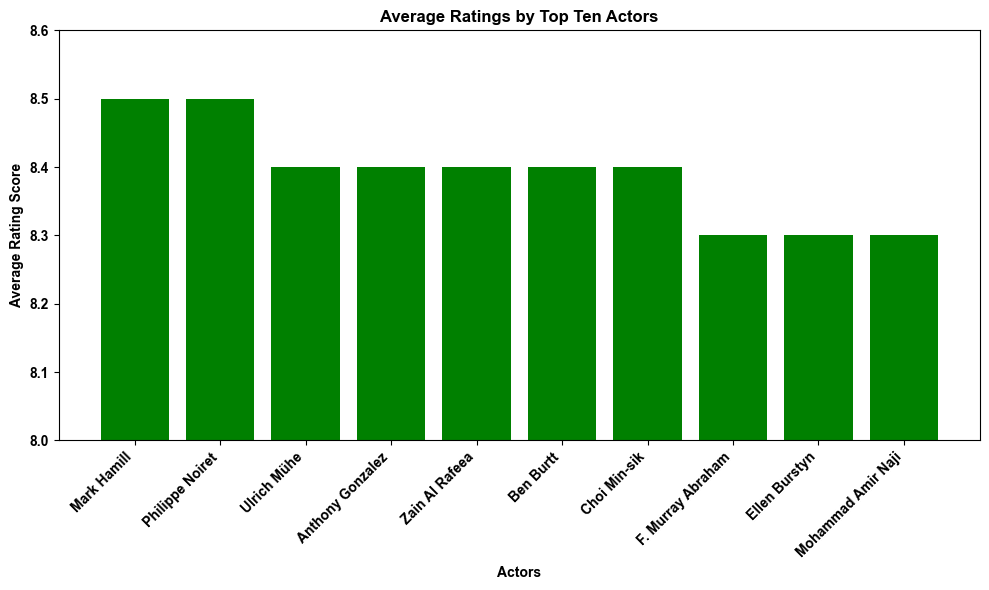

In [49]:
# Set font to Arial (or another sans-serif font of your choice)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Given data for actors
actors = ["Mark Hamill", "Philippe Noiret", "Ulrich Mühe", "Anthony Gonzalez", "Zain Al Rafeea",
          "Ben Burtt", "Choi Min-sik", "F. Murray Abraham", "Ellen Burstyn", "Mohammad Amir Naji"]
average_ratings_actors = [8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4, 8.3, 8.3, 8.3]

# Create a vertical bar chart for actors
plt.figure(figsize=(10, 6))
bars = plt.bar(actors, average_ratings_actors, color='green')

# Make x-axis labels bold
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Make y-axis label bold
plt.ylabel('Average Rating Score', fontweight='bold')

# Make title bold
plt.title('Average Ratings by Top Ten Actors', fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Make x-axis label bold
plt.xlabel('Actors', fontweight='bold')

# Set the original y-axis limits
plt.ylim(8.0, 8.6)

# Automatically adjust layout to prevent text cutoff
plt.tight_layout()

# Save the plot as a PNG file with tight bounding box
plt.savefig('average_ratings_actors_plot.png', bbox_inches="tight")

# Display the plot
plt.show()


## Total Gross by Top Ten Directors

In [11]:
# Calculate the total gross earnings for each director using groupby
total_gross_director = movies_cleaned.groupby('Director')['Gross'].sum().sort_values(ascending=False)

# Display the results
total_gross_dir = pd.DataFrame(total_gross_director).rename(columns={'Gross': 'Total Gross'})
total_gross_dir.head(10)

,Total Gross
Director,
Steven Spielberg,9.629049e+09
Anthony Russo,6.844249e+09
Peter Jackson,6.618046e+09
Michael Bay,6.451693e+09
James Cameron,6.248089e+09
Christopher Nolan,5.153548e+09
David Yates,5.044548e+09
J.J. Abrams,4.659375e+09
Tim Burton,4.456349e+09


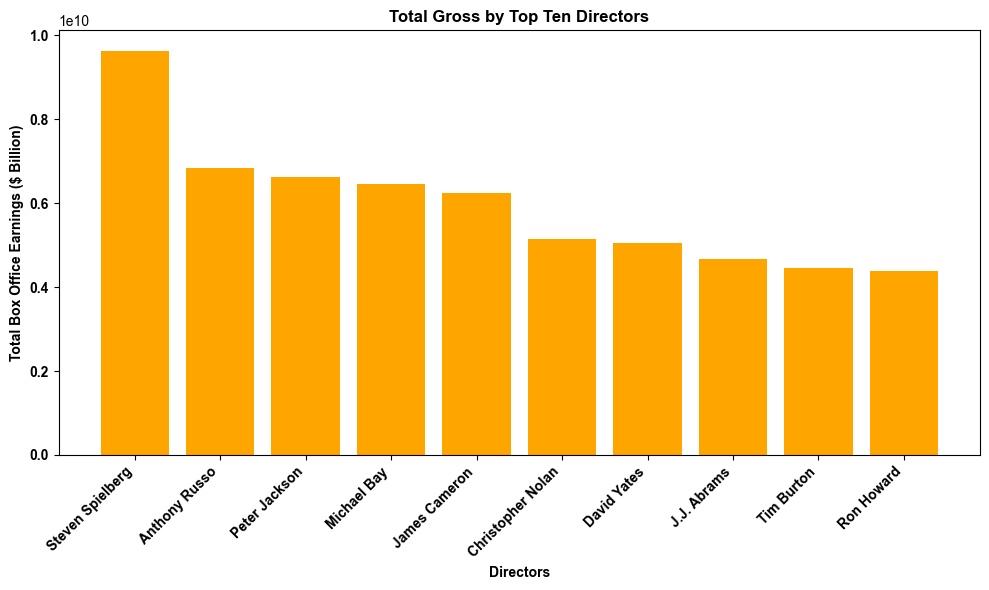

In [48]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font to Arial (or another sans-serif font of your choice)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Given data for directors and total gross
directors_gross = ["Steven Spielberg", "Anthony Russo", "Peter Jackson", "Michael Bay", "James Cameron",
                   "Christopher Nolan", "David Yates", "J.J. Abrams", "Tim Burton", "Ron Howard"]
total_gross = [9.629049e+09, 6.844249e+09, 6.618046e+09, 6.451693e+09, 6.248089e+09,
               5.153548e+09, 5.044548e+09, 4.659375e+09, 4.456349e+09, 4.388093e+09]

# Create a vertical bar chart for total gross by director
plt.figure(figsize=(10, 6))
bars = plt.bar(directors_gross, total_gross, color='orange')

# Make x-axis labels bold
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Make y-axis label bold
plt.ylabel('Total Box Office Earnings ($ Billion)', fontweight='bold')

# Make title bold
plt.title('Total Gross by Top Ten Directors', fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Make x-axis label bold
plt.xlabel('Directors', fontweight='bold')

# Automatically adjust layout to prevent text cutoff
plt.tight_layout()

# Save the plot as a PNG file with tight bounding box
plt.savefig('total_gross_directors_plot.png', bbox_inches="tight")

# Display the plot
plt.show()


## Total Gross by Top Ten Actors 

In [13]:
# Calculate the total gross earnings for each actor using groupby
total_gross_actor = movies_cleaned.groupby('Star')['Gross'].sum().sort_values(ascending=False)

# Display the results
total_gross_act = pd.DataFrame(total_gross_actor).rename(columns={'Star':'Actor', 'Gross': 'Total Gross'})
total_gross_act = total_gross_act.rename_axis('Actor')  # Rename the index to 'Actor'
total_gross_act.head(10)


,Total Gross
Actor,
Robert Downey Jr.,1.185594e+10
Tom Hanks,9.899945e+09
Tom Cruise,9.440310e+09
Will Smith,7.947279e+09
Johnny Depp,7.410125e+09
Daniel Radcliffe,6.971268e+09
Leonardo DiCaprio,6.963368e+09
Vin Diesel,6.036313e+09
Dwayne Johnson,5.711271e+09


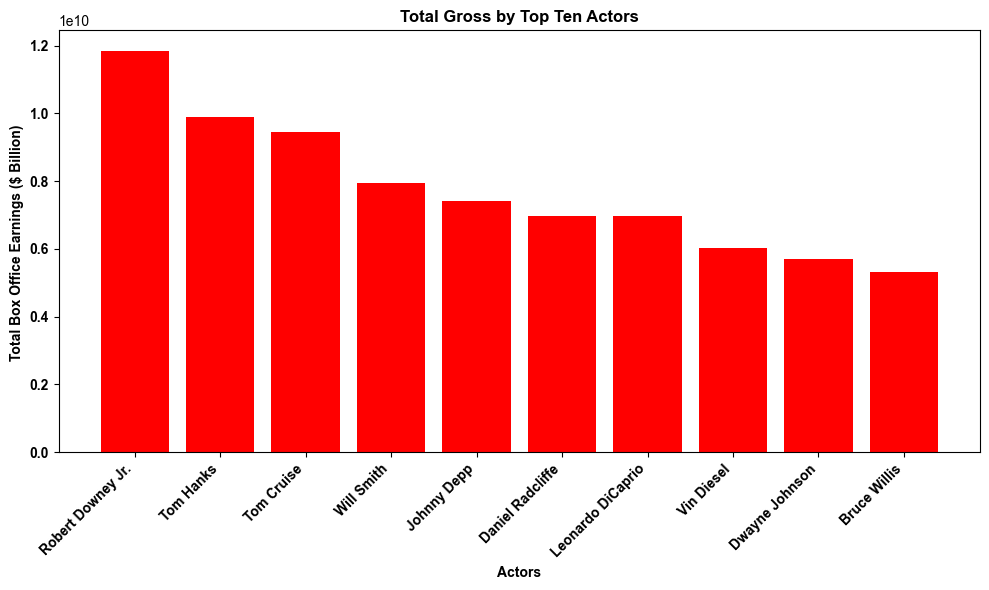

In [51]:
# Set font to Arial (or another sans-serif font of your choice)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Given data for actors and total gross
actors_gross = ["Robert Downey Jr.", "Tom Hanks", "Tom Cruise", "Will Smith", "Johnny Depp",
                "Daniel Radcliffe", "Leonardo DiCaprio", "Vin Diesel", "Dwayne Johnson", "Bruce Willis"]
total_gross_actors = [1.185594e+10, 9.899945e+09, 9.440310e+09, 7.947279e+09, 7.410125e+09,
                      6.971268e+09, 6.963368e+09, 6.036313e+09, 5.711271e+09, 5.318951e+09]

# Create a vertical bar chart for total gross by actor
plt.figure(figsize=(10, 6))
bars = plt.bar(actors_gross, total_gross_actors, color='red')

# Make x-axis labels bold
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Make y-axis label bold
plt.ylabel('Total Box Office Earnings ($ Billion) ', fontweight='bold')

# Make title bold
plt.title('Total Gross by Top Ten Actors', fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Make x-axis label bold
plt.xlabel('Actors', fontweight='bold')

# Automatically adjust layout to prevent text cutoff
plt.tight_layout()

# Save the plot as a PNG file with tight bounding box
plt.savefig('total_gross_actors_plot.png', bbox_inches="tight")

# Display the plot
plt.show()


## Average Votes by Top Ten Directors

In [15]:
# Calculate the average number of votes for each director using groupby
average_votes_director = movies_cleaned.groupby('Director')['Votes'].mean().sort_values(ascending=False)

# Display the results
avg_votes_director = pd.DataFrame(average_votes_director).rename(columns={'Votes': 'Average Votes'})
avg_votes_director.head(10)


,Average Votes
Director,
Christopher Nolan,1.158091e+06
Tony Kaye,1.100000e+06
Frank Darabont,9.850000e+05
Quentin Tarantino,9.680000e+05
Pete Docter,8.136667e+05
Stanley Kubrick,8.090000e+05
Joss Whedon,7.880000e+05
David Fincher,7.375000e+05
James Cameron,7.271429e+05


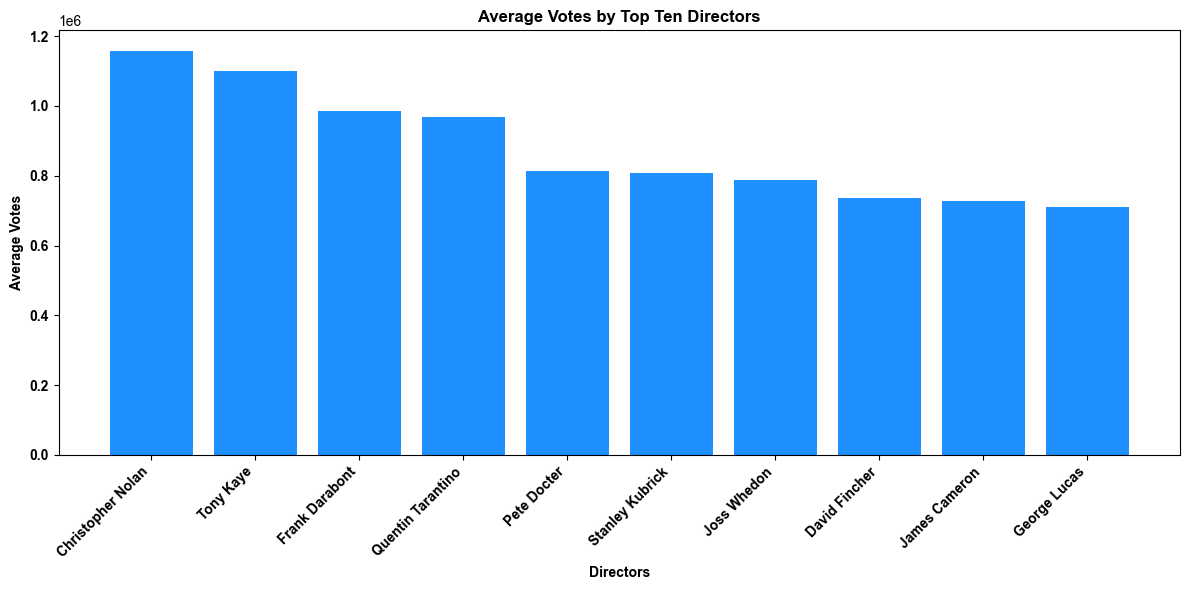

In [53]:
# Set font to Arial (or another sans-serif font of your choice)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Given data for directors and average votes
directors_votes = ["Christopher Nolan", "Tony Kaye", "Frank Darabont", "Quentin Tarantino", "Pete Docter",
                   "Stanley Kubrick", "Joss Whedon", "David Fincher", "James Cameron", "George Lucas"]
average_votes_directors = [1.158091e+06, 1.100000e+06, 9.850000e+05, 9.680000e+05, 8.136667e+05,
                           8.090000e+05, 7.880000e+05, 7.375000e+05, 7.271429e+05, 7.116667e+05]

# Create a vertical bar chart for average votes by director
plt.figure(figsize=(12, 6))
bars = plt.bar(directors_votes, average_votes_directors, color='DodgerBlue')

# Make x-axis labels bold
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Make y-axis label bold
plt.ylabel('Average Votes', fontweight='bold')

# Make title bold
plt.title('Average Votes by Top Ten Directors', fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Make x-axis label bold
plt.xlabel('Directors', fontweight='bold')

# Automatically adjust layout to prevent text cutoff
plt.tight_layout()

# Save the plot as a PNG file with tight bounding box
plt.savefig('average_votes_directors_plot.png', bbox_inches="tight")

# Display the plot
plt.show()


# Average Votes by Top Ten Actors

In [17]:
# Calculate the average number of votes for each actor using groupby
average_votes_actor = movies_cleaned.groupby('Star')['Votes'].mean().sort_values(ascending=False)

# Display the results
avg_votes_actor_df = pd.DataFrame(average_votes_actor).rename(columns={'Votes': 'Average Votes'})
avg_votes_actor_df = avg_votes_actor_df.rename_axis('Actor')  # Rename the index to 'Actor'
avg_votes_actor_df.head(10)


,Average Votes
Actor,
Hugo Weaving,1100000.0
Mark Hamill,1086500.0
Ben Burtt,1000000.0
Edward Asner,962000.0
Ellen Burstyn,786000.0
Brad Garrett,660000.0
Ivana Baquero,631000.0
Leonardo DiCaprio,601350.0
Gal Gadot,600000.0


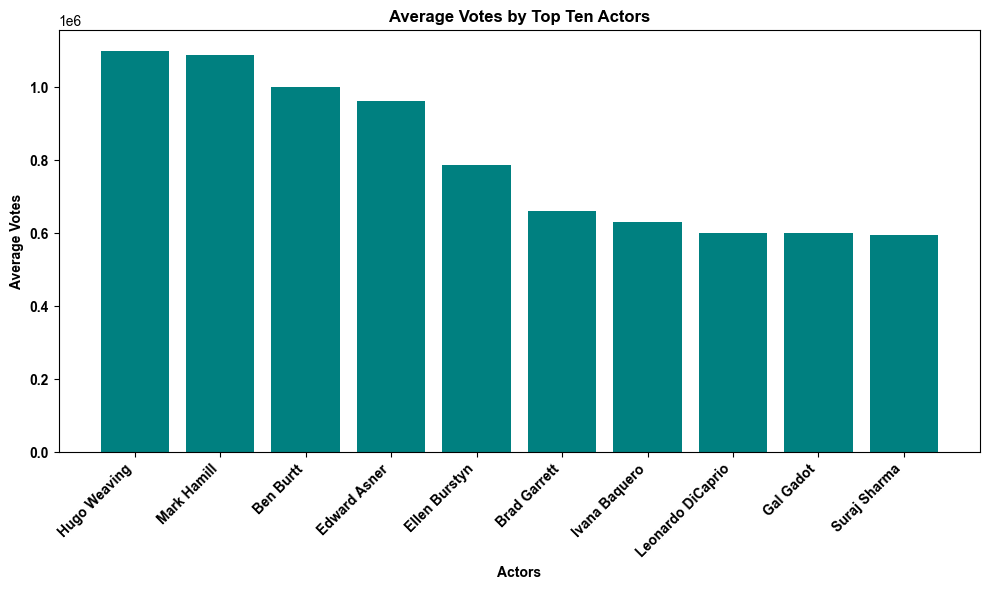

In [56]:
# Set font to Arial (or another sans-serif font of your choice)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Given data for actors and average votes
actors_votes = ["Hugo Weaving", "Mark Hamill", "Ben Burtt", "Edward Asner", "Ellen Burstyn",
                "Brad Garrett", "Ivana Baquero", "Leonardo DiCaprio", "Gal Gadot", "Suraj Sharma"]
average_votes_actors = [1100000.0, 1086500.0, 1000000.0, 962000.0, 786000.0,
                        660000.0, 631000.0, 601350.0, 600000.0, 594000.0]

# Create a vertical bar chart for average votes by actors
plt.figure(figsize=(10, 6))
bars = plt.bar(actors_votes, average_votes_actors, color='teal')

# Make x-axis labels bold
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Make y-axis label bold
plt.ylabel('Average Votes', fontweight='bold')

# Make title bold
plt.title('Average Votes by Top Ten Actors', fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Make x-axis label bold
plt.xlabel('Actors', fontweight='bold')

# Automatically adjust layout to prevent text cutoff
plt.tight_layout()

# Save the plot as a PNG file with tight bounding box
plt.savefig('average_votes_actors_plot.png', bbox_inches="tight")

# Display the plot
plt.show()


### Data suggests that there is a distinction between critical acclaim and commercial success in the dataset. Directors who are highly rated on average may not necessarily have films that perform exceptionally well at the box office, and vice versa.

# Linear Regression: Director Rating vs. Actor Rating

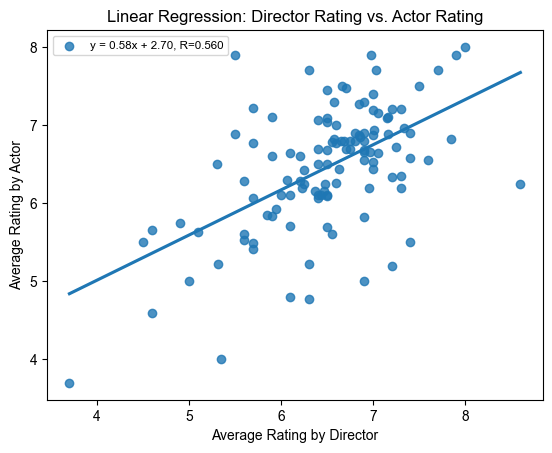

In [19]:
# Merge the DataFrames on 'Star' and 'Director'
merged_df = pd.merge(avg_rating_actor_df, avg_rating_director, left_index=True, right_index=True, how='inner', suffixes=('_actor', '_director'))

# Drop rows with missing values
merged_df = merged_df.dropna()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x=merged_df['Average Rating_Score_director'], y=merged_df['Average Rating_Score_actor'])

# Plot the regression line
sns.regplot(x=merged_df['Average Rating_Score_director'], y=merged_df['Average Rating_Score_actor'], ci=None)
plt.title('Linear Regression: Director Rating vs. Actor Rating')
plt.xlabel('Average Rating by Director')
plt.ylabel('Average Rating by Actor')

# Add the equation of the regression line to the legend
equation_text = f'y = {slope:.2f}x + {intercept:.2f}, R={r_value:.3f}'
plt.legend([equation_text], fontsize='small')  

# Export the plot as a PNG file with tight bounding box
plt.savefig('linear_regression_rating_plot.png', bbox_inches="tight")

plt.show()


### The positive correlation (R=0.560) between the average ratings by directors and actors suggests that there is a moderate tendency for movies to receive consistent ratings across both these groups. In other words, movies that are well-received by directors tend to also be well-received by actors, and vice versa. This correlation aligns with the expectation that a movie's overall quality, as reflected in its direction and acting, contributes to its positive reception by audiences. However, it's important to note that correlation does not imply causation, and the analysis doesn't provide insights into the specific factors influencing this correlation.

# Linear Regression: Total Gross by Director vs. Total Gross by Actor

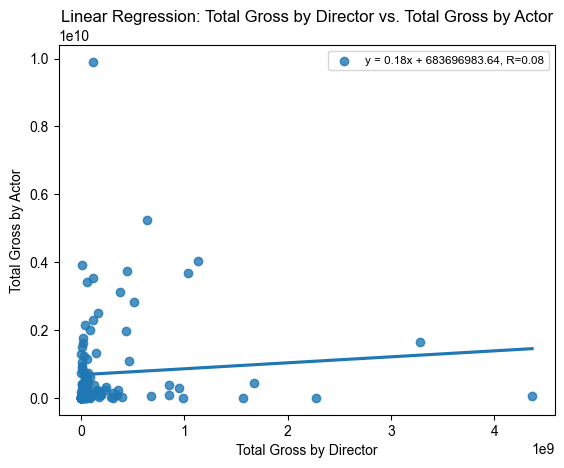

In [20]:
# Merge the DataFrames on 'Director' and 'Actor'
merged_gross_df = pd.merge(total_gross_dir, total_gross_act, left_index=True, right_index=True, how='inner', suffixes=('_director', '_actor'))

# Drop rows with missing values
merged_gross_df = merged_gross_df.dropna()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x=merged_gross_df['Total Gross_director'], y=merged_gross_df['Total Gross_actor'])

# Plot the regression line
sns.regplot(x=merged_gross_df['Total Gross_director'], y=merged_gross_df['Total Gross_actor'], ci=None)
plt.title('Linear Regression: Total Gross by Director vs. Total Gross by Actor')
plt.xlabel('Total Gross by Director')
plt.ylabel('Total Gross by Actor')

# Add the equation of the regression line to the legend
equation_text = f'y = {slope:.2f}x + {intercept:.2f}, R={r_value:.2f}'
plt.legend([equation_text], fontsize='small')  

# Export the plot as a PNG file with tight bounding box
plt.savefig('linear_regression_totalgross_plot.png', bbox_inches="tight")

plt.show()

# Linear Regression: Average Votes by Director vs. Average Votes by Actor

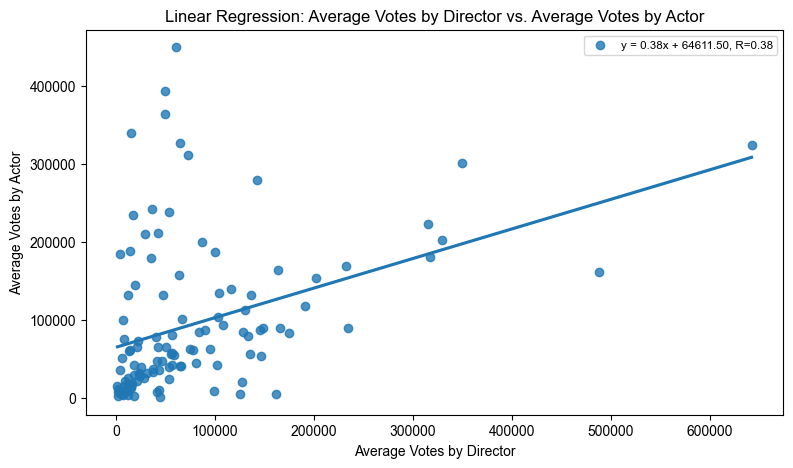

In [21]:
# Merge the DataFrames on 'Director' and 'Star'
merged_votes_df = pd.merge(avg_votes_director, avg_votes_actor_df, left_index=True, right_index=True, how='inner', suffixes=('_director', '_actor'))

# Drop rows with missing values
merged_votes_df = merged_votes_df.dropna()

# Set the figure size
plt.figure(figsize=(9, 5))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x=merged_votes_df['Average Votes_director'], y=merged_votes_df['Average Votes_actor'])

# Plot the regression line
sns.regplot(x=merged_votes_df['Average Votes_director'], y=merged_votes_df['Average Votes_actor'], ci=None)
plt.title('Linear Regression: Average Votes by Director vs. Average Votes by Actor')
plt.xlabel('Average Votes by Director')
plt.ylabel('Average Votes by Actor')

# Add the equation of the regression line to the legend
equation_text = f'y = {slope:.2f}x + {intercept:.2f}, R={r_value:.2f}'
plt.legend([equation_text], fontsize='small')  


# Export the plot as a PNG file with tight bounding box
plt.savefig('linear_regression_averagevotes_plot.png', bbox_inches="tight")

plt.show()


# Top 10 Director-Actor Pairs and Analyzing Impact by Average Ratings and Top Grossing| Combined Impact

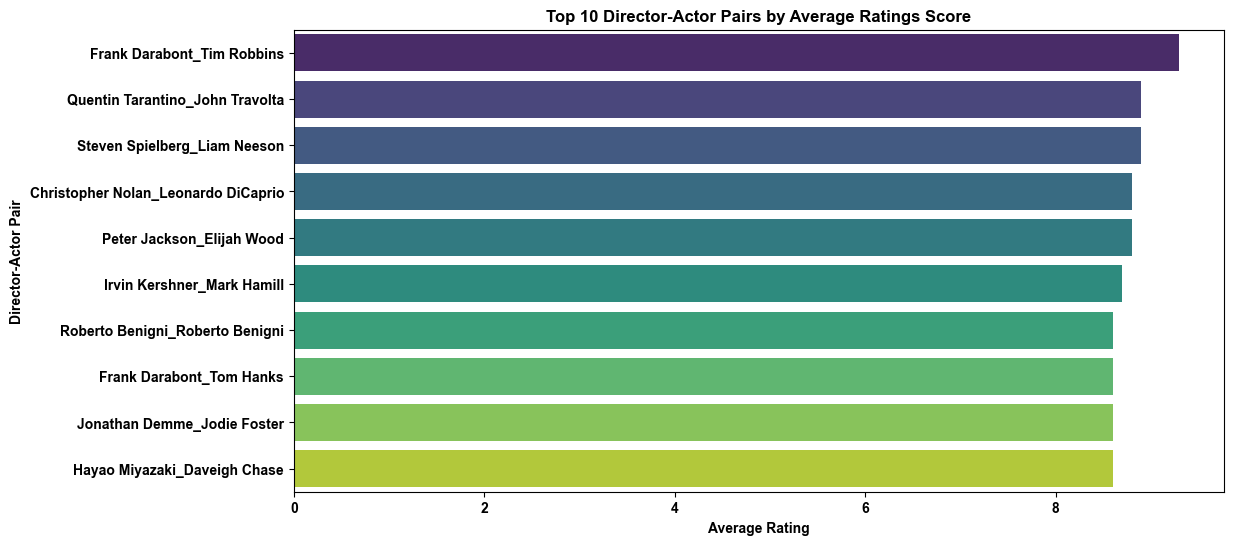

In [22]:
# Creating Director-Actor Pairs and Analyzing Impact

# Creates a new column named Director_Actor_Pair
movies_cleaned['Director_Actor_Pair'] = movies_cleaned['Director'] + '_' + movies_cleaned['Star']

# Groups the dataset by the 'Director_Actor_Pair' column and calculates the mean of 'Rating_Score
avg_ratings_by_pair = movies_cleaned.groupby('Director_Actor_Pair')['Rating_Score'].mean().reset_index()

# Sorts the DataFrame of average ratings in descending order and selects the top 10 pairs with the highest average ratings.
top_rated_pairs = avg_ratings_by_pair.sort_values(by='Rating_Score', ascending=False).head(10)

# Bar chart for top-rated pairs with a different color palette (e.g., 'Set2')
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating_Score', y='Director_Actor_Pair', hue='Director_Actor_Pair', data=top_rated_pairs, palette='viridis', legend=False)
plt.title('Top 10 Director-Actor Pairs by Average Ratings Score', fontweight='bold')
plt.xlabel('Average Rating', fontweight='bold')
plt.ylabel('Director-Actor Pair', fontweight='bold')

# Make x-axis tick labels bold
plt.xticks(fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Export the plot as a PNG file with tight bounding box
plt.savefig('Director_actor_pairs_ratings_plot.png', bbox_inches="tight")

plt.show()


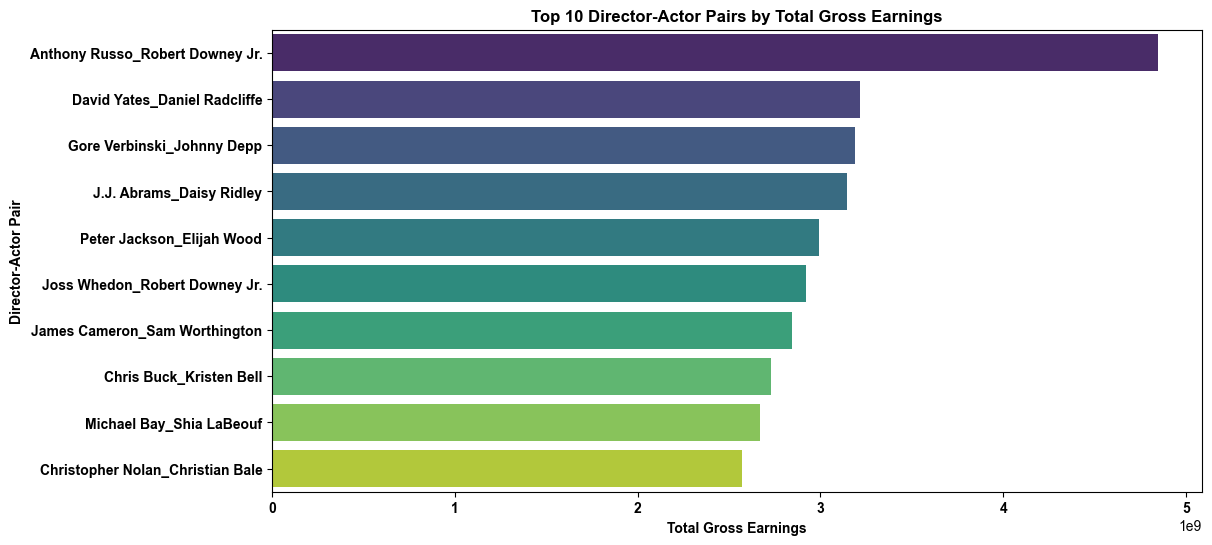

In [23]:
# groups the dataset by the 'Director_Actor_Pair' column and calculates the mean of 'Gross
total_gross_by_pair = movies_cleaned.groupby('Director_Actor_Pair')['Gross'].sum().reset_index()

# sorts the DataFrame of average ratings in descending order and selects the top 10 pairs with the highest total gross earnings.
top_grossing_pairs = total_gross_by_pair.sort_values(by='Gross', ascending=False).head(10)

# Bar chart for top-rated pairs
plt.figure(figsize=(12, 6))
sns.barplot(x='Gross', y='Director_Actor_Pair', hue='Director_Actor_Pair', data=top_grossing_pairs, palette='viridis', legend=False)
plt.title('Top 10 Director-Actor Pairs by Total Gross Earnings', fontweight='bold')
plt.xlabel('Total Gross Earnings', fontweight='bold')
plt.ylabel('Director-Actor Pair', fontweight='bold')

# Make x-axis tick labels bold
plt.xticks(fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Export the plot as a PNG file with tight bounding box
plt.savefig('Director_actor_pairs_totalgross_plot.png', bbox_inches="tight")

plt.show()


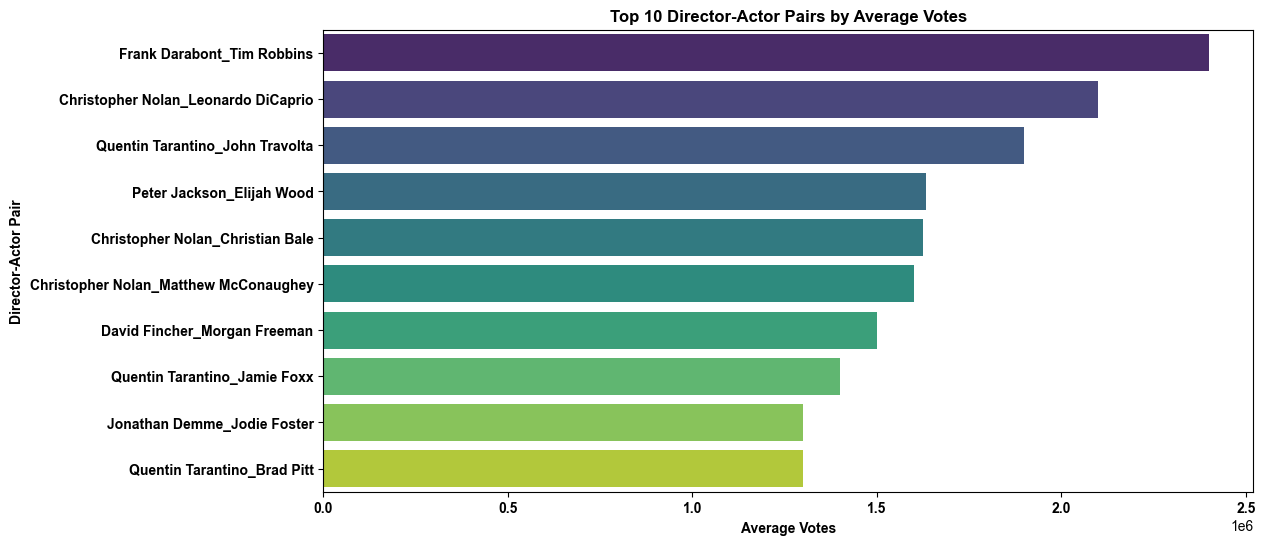

In [24]:
# Creating Director-Actor Pairs and Analyzing Impact

# Creates a new column named Director_Actor_Pair
movies_cleaned['Director_Actor_Pair'] = movies_cleaned['Director'] + '_' + movies_cleaned['Star']

# Groups the dataset by the 'Director_Actor_Pair' column and calculates the mean of 'Votes'
avg_votes_by_pair = movies_cleaned.groupby('Director_Actor_Pair')['Votes'].mean().reset_index()

# Sorts the DataFrame of average votes in descending order and selects the top 10 pairs with the highest average votes.
top_voted_pairs = avg_votes_by_pair.sort_values(by='Votes', ascending=False).head(10)

# Bar chart for top-voted pairs
plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Director_Actor_Pair', hue='Director_Actor_Pair', data=top_voted_pairs, palette='viridis', legend=False)
plt.title('Top 10 Director-Actor Pairs by Average Votes', fontweight='bold')
plt.xlabel('Average Votes', fontweight='bold')
plt.ylabel('Director-Actor Pair', fontweight='bold')

# Make x-axis tick labels bold
plt.xticks(fontweight='bold')

# Make y-axis tick labels bold
plt.yticks(fontweight='bold')

# Export the plot as a PNG file with tight bounding box
plt.savefig('Director_actor_pairs_votes_plot.png', bbox_inches="tight")

# Display the plot interactively
plt.show()


In [26]:
from scipy.stats import ttest_ind

# Assuming you have DataFrames avg_votes_director and avg_votes_actor_df with necessary columns

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(avg_votes_director['Average Votes'], avg_votes_actor_df['Average Votes'], equal_var=False)

# Print results
print(f"t-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average votes between directors and actors.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average votes between directors and actors.")


t-statistic: 0.0746
P-value: 0.9405
Fail to reject the null hypothesis. There is no significant difference in average votes between directors and actors.


##  Compare Total Gross between directors and actors using independent two-sample t-test

In [27]:
from scipy.stats import ttest_ind

# Assuming you have DataFrames total_gross_director and total_gross_actor_df with necessary columns

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(total_gross_dir['Total Gross'], total_gross_act['Total Gross'], equal_var=False)

# Print results
print(f"t-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average votes between directors and actors.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average votes between directors and actors.")


t-statistic: -1.3211
P-value: 0.1865
Fail to reject the null hypothesis. There is no significant difference in average votes between directors and actors.


## Compare average votes by director and Actor using independent two-sample t-test

In [28]:
from scipy.stats import ttest_ind

# Assuming you have DataFrames avg_votes_director and avg_votes_actor_df with necessary columns

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(avg_votes_director['Average Votes'], avg_votes_actor_df['Average Votes'], equal_var=False)

# Print results
print(f"t-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average votes between directors and actors.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average votes between directors and actors.")



t-statistic: 0.0746
P-value: 0.9405
Fail to reject the null hypothesis. There is no significant difference in average votes between directors and actors.


# Data Analytics Report: Impact of Directors and Actors on Movie Success

## Executive Summary
This data analytics report investigates the dynamic interplay between directors, actors, and the success of movies. The analysis focuses on critical aspects such as average ratings, total gross earnings, and average votes to uncover patterns and correlations that shed light on the influence of both directors and actors on the overall success of a movie.

### Average Ratings

#### Directors:
Top-rated directors, based on average ratings, play a crucial role in shaping a movie's success. Directors like Roberto Benigni, Tony Kaye, Nadine Labaki, Bob Persichettia and Sergio Leone consistently deliver high-quality content with average ratings above 8.40.

#### Actors:
Leading actors, including Mark Hamill, Philippe Noiret, Ulrich Mühe, Anthony Gonzalez, Zain Al Rafeea, Ben Burtt, Choi Min-sik,	 contribute significantly to a movie's success by delivering performances that resonate with audiences, as reflected in their high average ratings.

### Total Gross Earnings

#### Directors:
The cumulative worldwide box office earnings of directors like Steven Spielberg, Anthony Russo, and Peter Jackson highlight their impact on a movie's financial success. These directors consistently deliver movies that attract significant audiences and generate substantial revenue.

#### Actors:
Top-grossing actors, such as Robert Downey Jr., Tom Hanks, and Tom Cruise, demonstrate their ability to draw audiences and contribute to a movie's financial success with impressive cumulative worldwide box office earnings.

### Average Votes

#### Directors:
The average votes received by directors, with Christopher Nolan leading the pack, indicate their influence on audience engagement. Directors who can capture the audience's attention and appreciation contribute significantly to a movie's overall success.

#### Actors:
Actors like Mark Hamill, Ben Burtt, and Alexandre Rodrigues garner high average votes, emphasizing their role in creating movies that resonate with audiences and receive positive feedback.


### Linear Regression Analysis

#### Total Gross by Director vs. Total Gross by Actor:
The analysis suggests a weak positive correlation, indicating that both directors and actors contribute to a movie's financial success, but the relationship is not robust.

#### Average Votes by Director vs. Average Votes by Actor:
A moderate positive correlation suggests that directors and actors collectively impact audience engagement and appreciation, contributing to a movie's overall success.

#### Independent Two-Sample t-Tests:
The t-tests compare key metrics between directors and actors, providing insights into potential differences:
Compare Average Votes between Directors and Actors:
The analysis indicates no significant difference in audience votes between directors and actors.

#### Compare Total Gross between Directors and Actors:
No significant difference in total gross earnings is observed between directors and actors.

#### Compare Average Votes by Director and Actor:
The t-test reveals no significant difference in average votes between directors and actors.

### Conclusion
This report underscores the collaborative impact of directors and actors on a movie's success. While directors influence the critical and financial reception of a movie, actors contribute significantly to audience engagement. Filmmakers and industry professionals can leverage these insights to make informed decisions and enhance the overall success of their projects.
